<a href="https://colab.research.google.com/github/Hannan2004/PRODIGY_ML_02/blob/main/mallCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 125


In [36]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [37]:
print({df.shape})
print(df.describe)
print(df.info())
print(df.head)

{(200, 5)}
<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 

In [38]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [39]:
df = df.rename(columns={"Annual Income (k$)": "Annual Salary", "Spending Score (1-100)": "SpendingScore"})

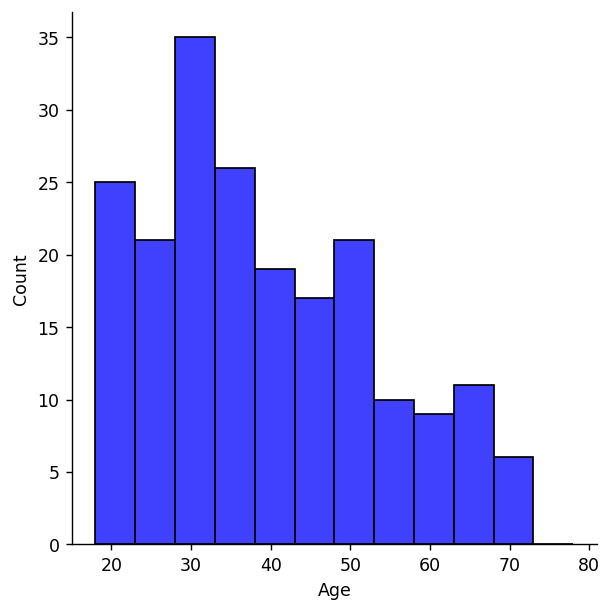

In [40]:
bins = range(18, 80, 5)
sns.displot(df.Age, color='blue', kde=False, bins=bins, label='Existing')

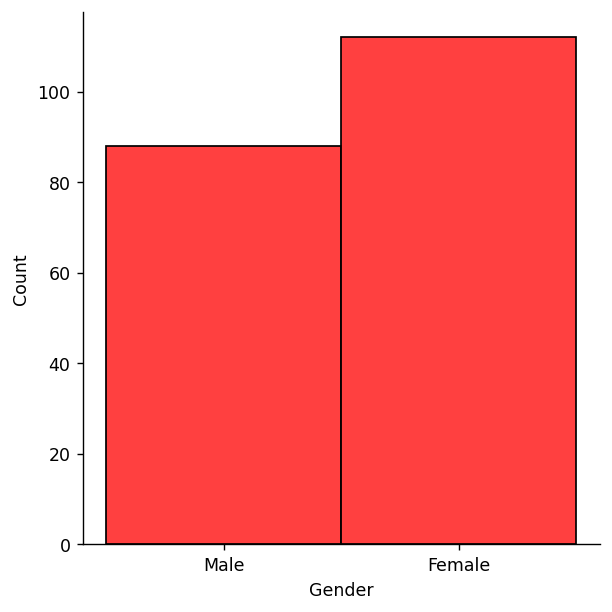

In [41]:
sns.displot(df.Gender, color='red', kde=False, bins=bins, label='Existing')

<Axes: xlabel='Age'>

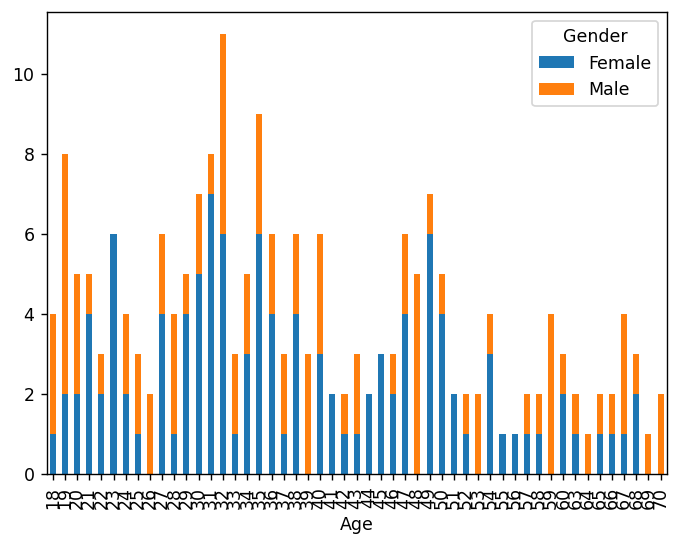

In [42]:
counts = df.groupby(['Age', 'Gender']).Age.count().unstack()
counts.plot(kind='bar', stacked=True)

In [43]:
df.head()

,CustomerID,Gender,Age,Annual Salary,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
bins= [18,25,35,45,55,65,75,85]
labels = ['18-25','25-35','35-45','45-55','55-65','65-75','75-85']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
bins= [15,25,35,45,55,65,75,85,95,105,115,125,135,145]
df['IncomeGroup'] = pd.cut(df['Annual Salary'], bins=bins, right=False)
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
df['SpendingScoreGroups'] = pd.cut(df['SpendingScore'], bins=bins, right=False)

<Axes: xlabel='IncomeGroup'>

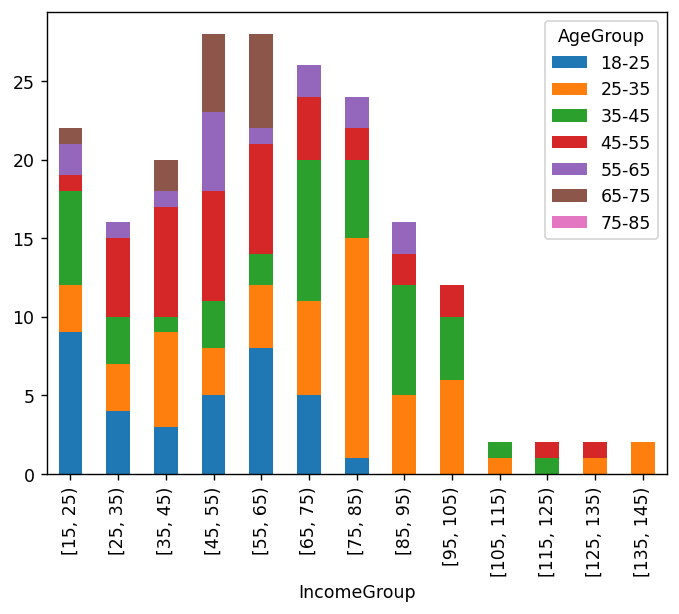

In [45]:
counts = df.groupby(['IncomeGroup', 'AgeGroup']).AgeGroup.count().unstack()
counts.plot(kind='bar', stacked=True)

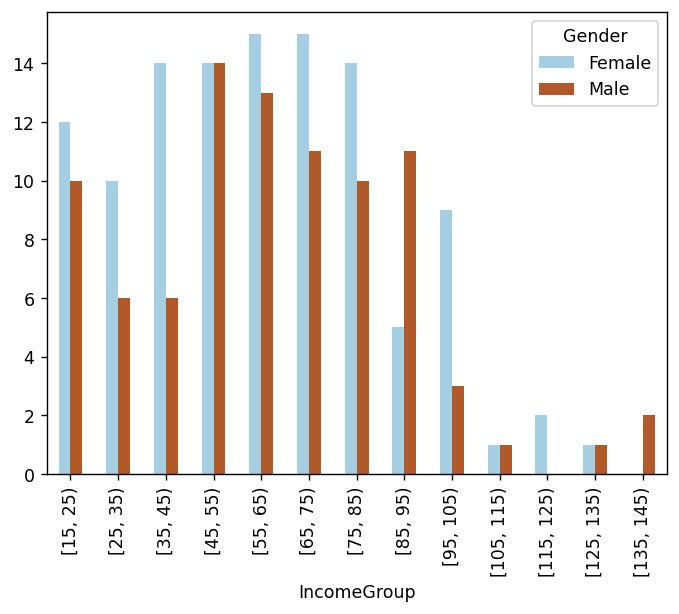

In [46]:
counts = df.groupby(['IncomeGroup', 'Gender']).Age.count().unstack()
ax = counts.plot(kind='bar', stacked=False, colormap= 'Paired')
plt.show()

In [47]:
df.head()

,CustomerID,Gender,Age,Annual Salary,SpendingScore,AgeGroup,IncomeGroup,SpendingScoreGroups
0,1,Male,19,15,39,18-25,"[15, 25)","[35, 40)"
1,2,Male,21,15,81,18-25,"[15, 25)","[80, 85)"
2,3,Female,20,16,6,18-25,"[15, 25)","[5, 10)"
3,4,Female,23,16,77,18-25,"[15, 25)","[75, 80)"
4,5,Female,31,17,40,25-35,"[15, 25)","[40, 45)"


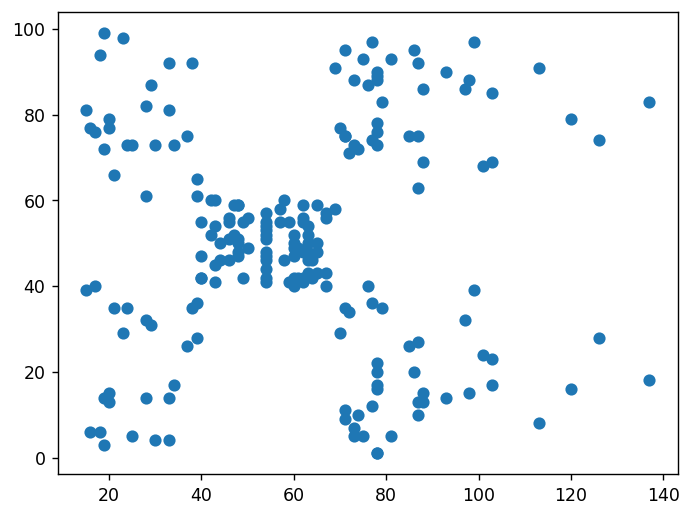

In [48]:
plt.scatter(x = df['Annual Salary'], y = df['SpendingScore'])

In [49]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

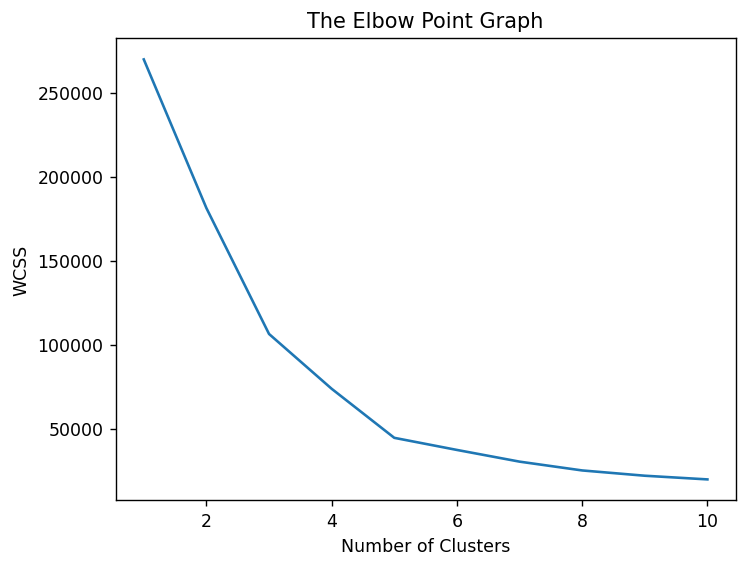

In [50]:
cluster = df.iloc[:,[3,4]].values
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(cluster)

  wcss.append(kmeans.inertia_)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')

plt.show()

In [51]:
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=40)

Y = kmeans.fit_predict(cluster)
print(np.unique(Y))

[0 1 2 3 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


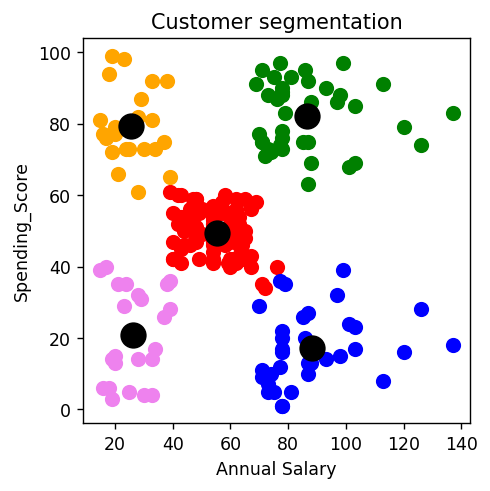

In [52]:
plt.figure(figsize=(4,4))
plt.scatter(cluster[Y==0,0], cluster[Y==0,1], s=60, c='violet', label='Cluster 1')
plt.scatter(cluster[Y==1,0], cluster[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(cluster[Y==2,0], cluster[Y==2,1], s=60, c='green', label='Cluster 3')
plt.scatter(cluster[Y==3,0], cluster[Y==3,1], s=60, c='blue', label='Cluster 4')
plt.scatter(cluster[Y==4,0], cluster[Y==4,1], s=60, c='orange', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black')

plt.title('Customer segmentation')
plt.xlabel('Annual Salary')
plt.ylabel('Spending_Score')
plt.show()